# 512hw4 Common Analysis

In [87]:
# Import the libraries
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1 - data acquisition
3 data sources

Maricopa

Arizona

County FIPS code?

In [88]:
# mask_use_by_county data
df1 = pd.read_csv("mask-use-by-county.csv")
print(df1.columns)
df1

Index(['COUNTYFP', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'], dtype='object')


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [89]:
# mask mandate data
df2 = pd.read_csv("U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
df2.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation'],
      dtype='object')

In [90]:
# raw vs confirmed cases data
df3 = pd.read_csv("RAW_us_confirmed_cases.csv")
print(df3.columns)
df3

Index(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/23/21', '10/24/21', '10/25/21', '10/26/21', '10/27/21', '10/28/21',
       '10/29/21', '10/30/21', '10/31/21', '11/1/21'],
      dtype='object', length=661)


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5119,5119,5152,5164,5168,5185,5204,5204,5204,5218
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3781,3781,3794,3805,3814,3817,3829,3829,3829,3843
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1677,1677,1690,1700,1715,1719,1731,1731,1731,1745


In [91]:
# clean and join the datasets

In [92]:
df2.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation'],
      dtype='object')

In [93]:
def transform_county_fips(x):
    if x >= 100:
        return str(x)
    elif 10 <= x < 100:
        return '0' + str(x)
    else:
        return '00' + str(x)

In [94]:
df2['FIPS_State'] = df2.FIPS_State.apply(lambda x: str(x) if x >= 10 else '0' + str(x))
df2['FIPS_County'] = df2.FIPS_County.apply(transform_county_fips)

In [95]:
df2['FIPS'] = df2['FIPS_State'] + df2['FIPS_County']

In [124]:
df2_reduced = df2.drop(columns=['State_Tribe_Territory', 'FIPS_State', 'FIPS_County', 'URL', 'Citation'])
df2_reduced['date'] =  pd.to_datetime(df2_reduced['date'])
df2_reduced

,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,FIPS
0,Autauga County,2020-04-10,2,NaN,NaN,01001
1,Autauga County,2020-04-11,2,NaN,NaN,01001
2,Autauga County,2020-04-12,2,NaN,NaN,01001
3,Autauga County,2020-04-13,2,NaN,NaN,01001
4,Autauga County,2020-04-14,2,NaN,NaN,01001
...,...,...,...,...,...,...
1593864,St. Thomas Island,2021-08-11,1,Yes,Official,78030
1593865,St. Thomas Island,2021-08-12,1,Yes,Official,78030
1593866,St. Thomas Island,2021-08-13,1,Yes,Official,78030
1593867,St. Thomas Island,2021-08-14,1,Yes,Official,78030


In [105]:
df2_reduced.Face_Masks_Required_in_Public.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [98]:
df3['FIPS'].isnull().values.any()

True

In [107]:
# function to change the county fips code for mask mandate data
# input x is float
def transform_county_fips_2(x):
    a = int(x)
    if a >= 10000:
        return str(a)
    else:
        return '0' + str(a)

In [108]:
df3_reduced = df3.drop(columns=['Admin2', 'UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df3_reduced = df3_reduced[df3_reduced['FIPS'].notna()]
df3_reduced['FIPS'] = df3_reduced.FIPS.apply(transform_county_fips_2)
print(df3_reduced.FIPS)

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3337    56039
3338    56041
3339    90056
3340    56043
3341    56045
Name: FIPS, Length: 3332, dtype: object


In [123]:
# transform df3 cols into rows using melt
df3_unpivot = df3_reduced.melt(id_vars=['Province_State','FIPS'], 
        var_name="date", 
        value_name="case_count")

df3_unpivot['date'] =  pd.to_datetime(df3_unpivot['date'])
df3_unpivot

,Province_State,FIPS,date,case_count
0,Alabama,01001,2020-01-22,0
1,Alabama,01003,2020-01-22,0
2,Alabama,01005,2020-01-22,0
3,Alabama,01007,2020-01-22,0
4,Alabama,01009,2020-01-22,0
...,...,...,...,...
2165795,Wyoming,56039,2021-11-01,5218
2165796,Wyoming,56041,2021-11-01,3843
2165797,Wyoming,90056,2021-11-01,0
2165798,Wyoming,56043,2021-11-01,1745


In [131]:
maricopa_mask_df = df2_reduced[df2_reduced['FIPS'] == '04013']
maricopa_mask_df

,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,FIPS
27398,Maricopa County,2020-04-10,2,NaN,NaN,04013
27399,Maricopa County,2020-04-11,2,NaN,NaN,04013
27400,Maricopa County,2020-04-12,2,NaN,NaN,04013
27401,Maricopa County,2020-04-13,2,NaN,NaN,04013
27402,Maricopa County,2020-04-14,2,NaN,NaN,04013
...,...,...,...,...,...,...
883581,Maricopa County,2021-08-11,2,NaN,NaN,04013
883582,Maricopa County,2021-08-12,2,NaN,NaN,04013
883583,Maricopa County,2021-08-13,2,NaN,NaN,04013
883584,Maricopa County,2021-08-14,2,NaN,NaN,04013


In [132]:
maricopa_mask_df.Face_Masks_Required_in_Public.unique()

array([nan], dtype=object)

In [134]:
# compare to similar county!!
# my maricopa county has no mask mandate!!!

In [127]:
# the FIPS code of maricopa is 04013
maricopa_cases_df = df3_unpivot[df3_unpivot['FIPS'] == '04013']
mask = (maricopa_cases_df['date'] >= '2020-02-01') & (maricopa_cases_df['date'] <= '2021-10-15')
maricopa_cases_df_reduced = maricopa_cases_df.loc[mask]
maricopa_cases_df_reduced

,Province_State,FIPS,date,case_count
33430,Arizona,04013,2020-02-01,1
36762,Arizona,04013,2020-02-02,1
40094,Arizona,04013,2020-02-03,1
43426,Arizona,04013,2020-02-04,1
46758,Arizona,04013,2020-02-05,1
...,...,...,...,...
2092606,Arizona,04013,2021-10-11,711742
2095938,Arizona,04013,2021-10-12,712879
2099270,Arizona,04013,2021-10-13,714404
2102602,Arizona,04013,2021-10-14,715923


## Step 2 - data processing


## Step 3 - plot the data


In [ ]:
df = df_cleaned[['year','month','pagecount_mobile_views', 'pagecount_desktop_views','pagecount_all_views']]
df1 = df.loc[df['pagecount_all_views'] > 0]
df1.rename(columns={'pagecount_mobile_views':'mobile_traffic', 'pagecount_desktop_views':'desktop_traffic','pagecount_all_views':'all_traffic'}, inplace=True)
#df1

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df = df_cleaned[['year','month','pageview_mobile_views', 'pageview_desktop_views','pageview_all_views']]
df2 = df.loc[df['pageview_all_views'] > 0]
df2.rename(columns={'pageview_mobile_views':'mobile_traffic', 'pageview_desktop_views':'desktop_traffic','pageview_all_views':'all_traffic'}, inplace=True)
#df2

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
frames = [df1[:90], df2]
df_plot = pd.concat(frames)
df_plot['time'] = df_plot['year'] + '-' + df_plot['month']
df_plot

access,year,month,mobile_traffic,desktop_traffic,all_traffic,time
0,2008,01,0,4930902570,4930902570,2008-01
1,2008,02,0,4818393763,4818393763,2008-02
2,2008,03,0,4955405809,4955405809,2008-03
3,2008,04,0,5159162183,5159162183,2008-04
4,2008,05,0,5584691092,5584691092,2008-05
...,...,...,...,...,...,...
159,2021,04,4759095083,2882714492,7641809575,2021-04
160,2021,05,4976579558,2824416177,7800995735,2021-05
161,2021,06,4584510417,2505971366,7090481783,2021-06
162,2021,07,4778909421,2765584368,7544493789,2021-07


In [ ]:
df = df_plot.melt(id_vars=["year", "month", "time"], 
        var_name="type", 
        value_name="count")
df

,year,month,time,type,count
0,2008,01,2008-01,mobile_traffic,0
1,2008,02,2008-02,mobile_traffic,0
2,2008,03,2008-03,mobile_traffic,0
3,2008,04,2008-04,mobile_traffic,0
4,2008,05,2008-05,mobile_traffic,0
...,...,...,...,...,...
487,2021,04,2021-04,all_traffic,7641809575
488,2021,05,2021-05,all_traffic,7800995735
489,2021,06,2021-06,all_traffic,7090481783
490,2021,07,2021-07,all_traffic,7544493789


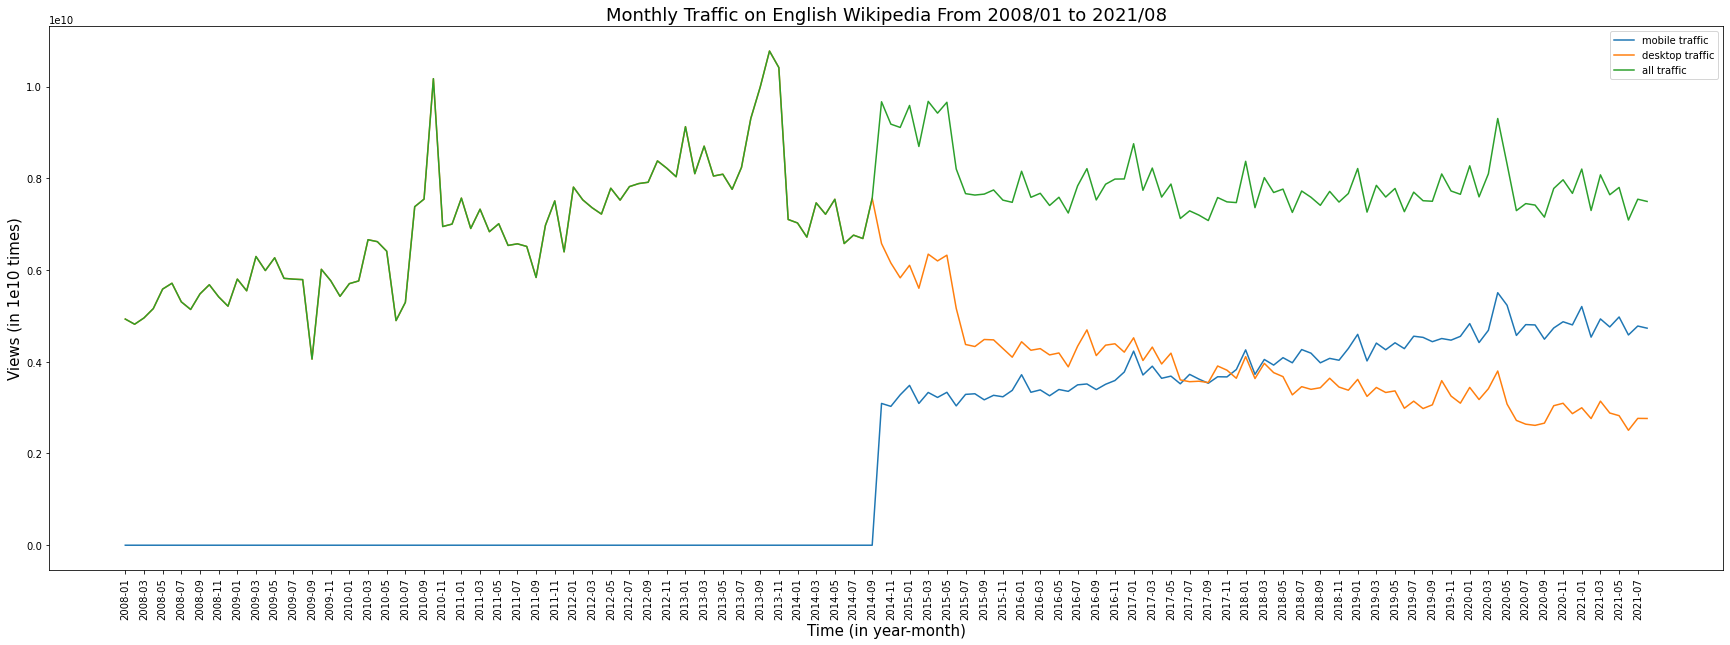

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation='vertical')


g = sns.lineplot(x="time", 
             y="count",
             estimator=sum,
             ci=None,
             hue="type", 
             data=df)

g.set(xticks=df.time[0::6])
g.set_title('Monthly Traffic on English Wikipedia From 2008/01 to 2021/08', size = 18)
g.set_xlabel('Time (in year-month)', size = 15)
g.set_ylabel('Views (in 1e10 times)', size = 15)
g.legend(labels = ["mobile traffic", "desktop traffic", "all traffic"])

# save the plot to png
plt.savefig('traffic data plot')
plt.show()

Update: I saw the slack message just before the deadline. It seems that we need to plot all six lines. Down below is my new plot.

In [ ]:
df_cleaned['time'] = df_cleaned['year'] + '-' + df_cleaned['month']
df2 = df_cleaned.melt(id_vars=["year", "month", "time"], 
        var_name="type", 
        value_name="count")
df2

,year,month,time,type,count
0,2008,01,2008-01,pagecount_desktop_views,4930902570
1,2008,02,2008-02,pagecount_desktop_views,4818393763
2,2008,03,2008-03,pagecount_desktop_views,4955405809
3,2008,04,2008-04,pagecount_desktop_views,5159162183
4,2008,05,2008-05,pagecount_desktop_views,5584691092
...,...,...,...,...,...
979,2021,04,2021-04,pageview_all_views,7641809575
980,2021,05,2021-05,pageview_all_views,7800995735
981,2021,06,2021-06,pageview_all_views,7090481783
982,2021,07,2021-07,pageview_all_views,7544493789


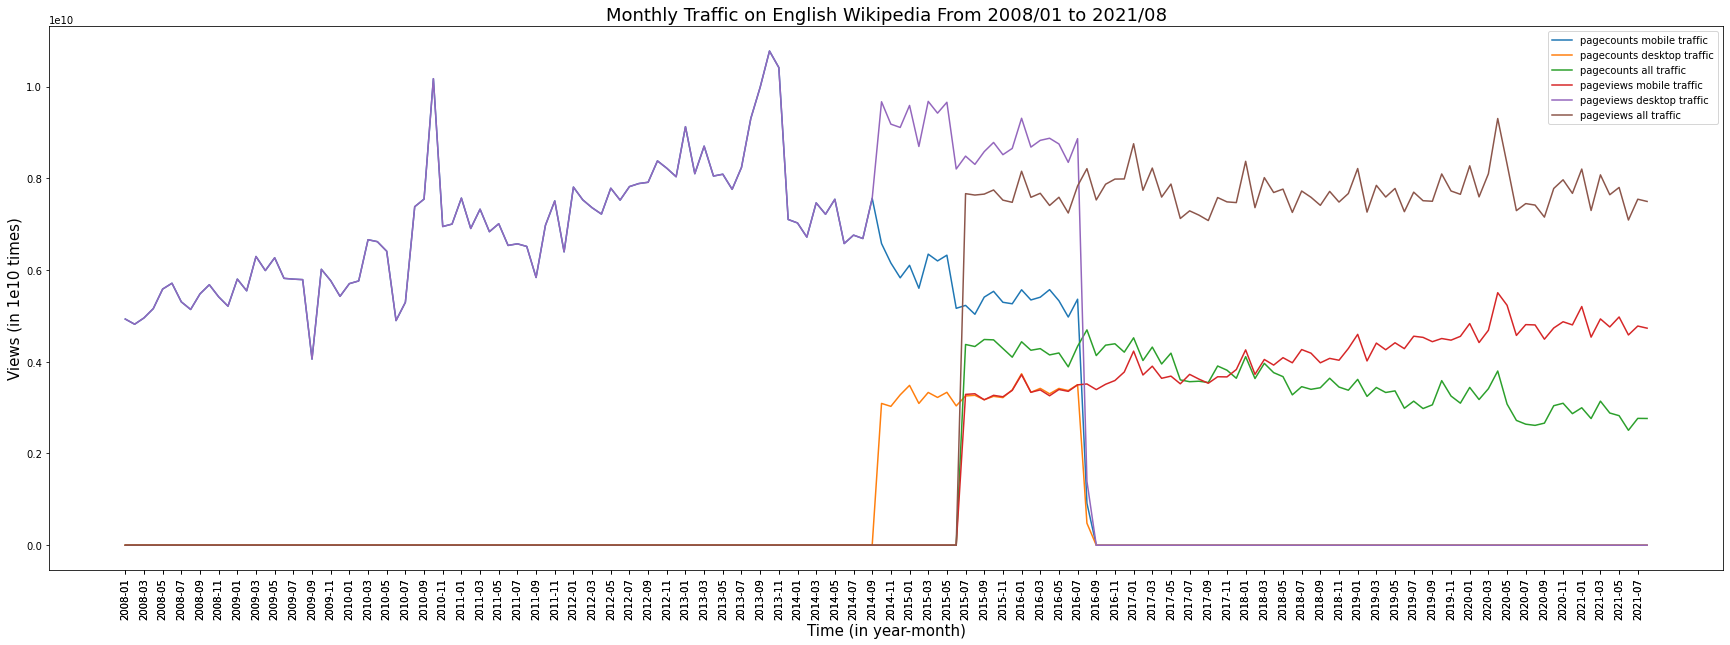

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation='vertical')


g = sns.lineplot(x="time", 
             y="count",
             estimator=sum,
             ci=None,
             hue="type", 
             data=df2)

g.set(xticks=df2.time[0::6])
g.set_title('Monthly Traffic on English Wikipedia From 2008/01 to 2021/08', size = 18)
g.set_xlabel('Time (in year-month)', size = 15)
g.set_ylabel('Views (in 1e10 times)', size = 15)
g.legend(labels = ["pagecounts mobile traffic", "pagecounts desktop traffic", "pagecounts all traffic", "pageviews mobile traffic", "pageviews desktop traffic", "pageviews all traffic"])

# save the plot to png
plt.savefig('traffic data plot (modified)')
plt.show()